In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Importing dependencies: -

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset: -

In [ ]:
dataset=pd.read_excel('/content/drive/My Drive/datasets/case_study_data.xlsx')
dataset.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,6,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,3,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,5,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,6,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,6,A124,80,A143,A153,3,A173,3,A191,A201,2


In [ ]:
print(dataset.shape)

(1000, 21)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

# Data pre-processing: -

## Checking presence of Null values

In [ ]:
dataset.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
purpose              0
amount               0
svaing_acc           0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residing_since       0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
dtype: int64

## Checking presence of duplicate values: -

In [ ]:
dataset.duplicated().sum()

0

### Explicit conversion to the suitable data types: -

In [ ]:
dataset["checkin_acc"]=dataset["checkin_acc"].astype("category")
dataset["credit_history"]=dataset["credit_history"].astype("category")
dataset["purpose"]=dataset["purpose"].astype("category")
dataset["svaing_acc"]=dataset["svaing_acc"].astype("category")
dataset["present_emp_since"]=dataset["present_emp_since"].astype("category")
dataset["personal_status"]=dataset["personal_status"].astype("category")
dataset["other_debtors"]=dataset["other_debtors"].astype("category")
dataset["property"]=dataset["property"].astype("category")
dataset["inst_plans"]=dataset["inst_plans"].astype("category")
dataset["housing"]=dataset["housing"].astype("category")
dataset["job"]=dataset["job"].astype("category")
dataset["telephone"]=dataset["telephone"].astype("category")
dataset["foreign_worker"]=dataset["foreign_worker"].astype("category")
dataset["status"]=dataset["status"].astype("category")
dataset["inst_rate"]=dataset["inst_rate"].astype("category")
dataset["residing_since"]=dataset["residing_since"].astype("category")
dataset["num_credits"]=dataset["num_credits"].astype("category")
dataset["dependents"]=dataset["dependents"].astype("category")

In [ ]:
dataset.describe()

,duration,amount,age
count,1000.000000,1000.000000,1000.000000
mean,31.449000,4907.134000,53.566000
std,18.055564,4234.100176,17.065664
min,6.000000,375.000000,29.000000
25%,18.000000,2048.250000,41.000000
50%,27.000000,3479.500000,50.000000
75%,36.000000,5958.500000,63.000000
max,108.000000,27636.000000,113.000000


## Presence of possible odd values in the dataset: -

In [ ]:
df=dataset[dataset['age']>100]
df

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,6,A121,101,A143,A152,3,A173,2,A192,A201,1
163,A12,15,A32,A40,10962,A61,A71,3,A93,A101,6,A124,105,A141,A153,2,A174,2,A192,A201,1
186,A12,14,A31,A41,7694,A61,A75,3,A92,A101,6,A124,111,A141,A153,2,A174,3,A192,A201,2
187,A12,24,A34,A40,1763,A61,A71,3,A93,A101,5,A123,102,A143,A153,5,A171,2,A192,A201,1
330,A11,36,A34,A41,9923,A61,A71,3,A93,A101,6,A124,113,A143,A153,3,A174,2,A192,A201,1
430,A14,8,A32,A49,5172,A61,A74,2,A93,A101,6,A121,111,A143,A152,2,A172,2,A191,A201,1
536,A11,9,A32,A40,2061,A65,A71,6,A92,A101,5,A122,113,A143,A152,2,A174,2,A192,A201,1
554,A12,14,A32,A46,1799,A61,A74,6,A92,A101,6,A122,101,A143,A152,3,A174,2,A192,A201,1
606,A14,36,A34,A49,6789,A61,A73,5,A93,A101,3,A121,111,A143,A152,2,A174,2,A192,A201,1
756,A13,9,A34,A40,1949,A61,A73,2,A93,A101,2,A121,111,A143,A152,5,A171,3,A191,A202,1


### The age of these 13 customers are above 100 years which is quite inadmissible. So, these are kept aside before further analysis.

In [ ]:
df=dataset[dataset['age']<100]
print(df.shape)
print(type(df))

(987, 21)
<class 'pandas.core.frame.DataFrame'>


# Exploratory Data Analysis: -

## For categorical variables:

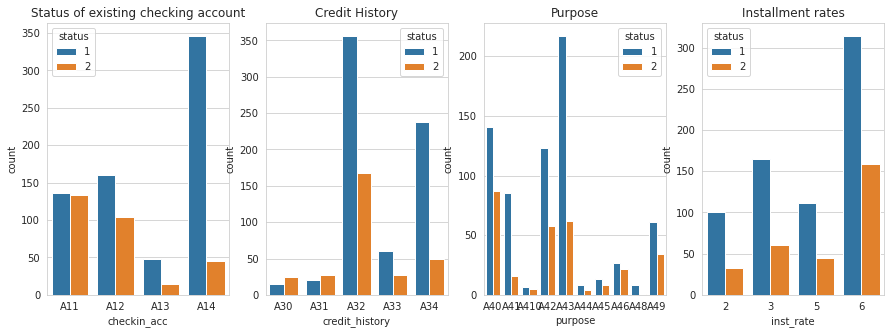

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.title('Status of existing checking account')
sns.countplot(x='checkin_acc', data=df, hue='status')
plt.subplot(1,4,2)
plt.title('Credit History')
sns.countplot(x='credit_history', data=df, hue='status')
plt.subplot(1,4,3)
plt.title('Purpose')
sns.countplot(x='purpose', data=df, hue='status')
plt.subplot(1,4,4)
plt.title('Installment rates')
sns.countplot(x='inst_rate', data=df, hue='status')
plt.show()

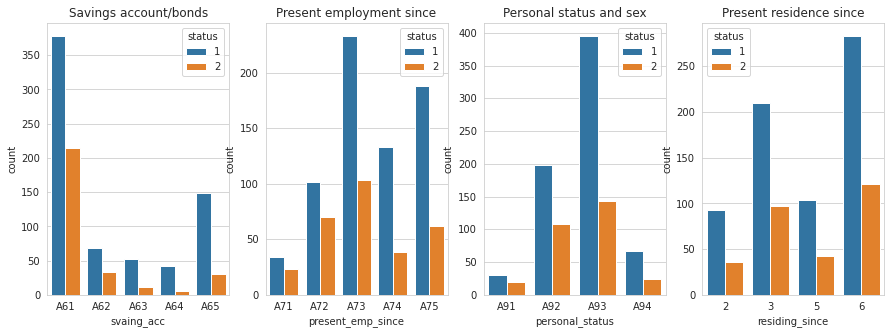

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.title('Savings account/bonds')
sns.countplot(x='svaing_acc', data=df, hue='status')
plt.subplot(1,4,2)
plt.title('Present employment since')
sns.countplot(x='present_emp_since', data=df, hue='status')
plt.subplot(1,4,3)
plt.title('Personal status and sex')
sns.countplot(x='personal_status', data=df, hue='status')
plt.subplot(1,4,4)
plt.title('Present residence since')
sns.countplot(x='residing_since', data=df, hue='status')
plt.show()

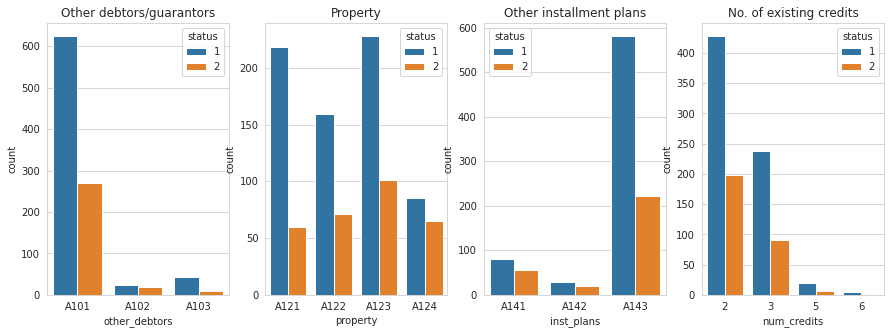

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.title('Other debtors/guarantors')
sns.countplot(x='other_debtors', data=df, hue='status')
plt.subplot(1,4,2)
plt.title('Property')
sns.countplot(x='property', data=df, hue='status')
plt.subplot(1,4,3)
plt.title('Other installment plans')
sns.countplot(x='inst_plans', data=df, hue='status')
plt.subplot(1,4,4)
plt.title('No. of existing credits')
sns.countplot(x='num_credits', data=df, hue='status')
plt.show()

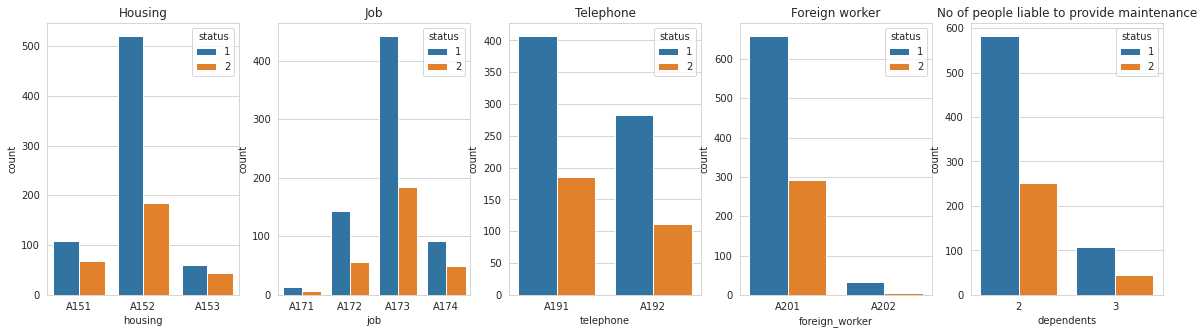

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.title('Housing')
sns.countplot(x='housing', data=df, hue='status')
plt.subplot(1,5,2)
plt.title('Job')
sns.countplot(x='job', data=df, hue='status')
plt.subplot(1,5,3)
plt.title('Telephone')
sns.countplot(x='telephone', data=df, hue='status')
plt.subplot(1,5,4)
plt.title('Foreign worker')
sns.countplot(x='foreign_worker', data=df, hue='status')
plt.subplot(1,5,5)
plt.title('No of people liable to provide maintenance')
sns.countplot(x='dependents', data=df, hue='status')
plt.show()

### Chi sq. tests to check independence between 'Credit risk Status' and the corresponding factor of interest: -
* H0: The attributes 'Credit risk Status' and the corresponding cateogrical var. are independent
* H1: They are not independent

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

In [ ]:
df1=pd.crosstab(df['checkin_acc'], df['status'])
c1, p1, dof1, expected1 = chi2_contingency(df1)
df2=pd.crosstab(df['credit_history'], df['status'])
c2, p2, dof2, expected2 = chi2_contingency(df2)
df3=pd.crosstab(df['purpose'], df['status'])
c3, p3, dof3, expected3 = chi2_contingency(df3)
df4=pd.crosstab(df['svaing_acc'], df['status'])
c4, p4, dof4, expected4 = chi2_contingency(df4)
df5=pd.crosstab(df['present_emp_since'], df['status'])
c5, p5, dof5, expected5 = chi2_contingency(df5)
df6=pd.crosstab(df['personal_status'], df['status'])
c6, p6, dof6, expected6 = chi2_contingency(df6)
df7=pd.crosstab(df['other_debtors'], df['status'])
c7, p7, dof7, expected7 = chi2_contingency(df7)
df8=pd.crosstab(df['property'], df['status'])
c8, p8, dof8, expected8 = chi2_contingency(df8)
df9=pd.crosstab(df['inst_plans'], df['status'])
c9, p9, dof9, expected9 = chi2_contingency(df9)
df10=pd.crosstab(df['housing'], df['status'])
c10, p10, dof10, expected10 = chi2_contingency(df10)
df11=pd.crosstab(df['job'], df['status'])
c11, p11, dof11, expected11 = chi2_contingency(df11)
df12=pd.crosstab(df['telephone'], df['status'])
c12, p12, dof12, expected12 = chi2_contingency(df12)
df13=pd.crosstab(df['foreign_worker'], df['status'])
c13, p13, dof13, expected13 = chi2_contingency(df13)
df14=pd.crosstab(df['inst_rate'], df['status'])
c14, p14, dof14, expected14 = chi2_contingency(df14)
df15=pd.crosstab(df['residing_since'], df['status'])
c15, p15, dof15, expected15 = chi2_contingency(df15)
df16=pd.crosstab(df['num_credits'], df['status'])
c16, p16, dof16, expected16 = chi2_contingency(df16)
df17=pd.crosstab(df['dependents'], df['status'])
c17, p17, dof17, expected17 = chi2_contingency(df17)
ind_values=['checkin_acc','credit_history','purpose','svaing_acc','present_emp_since','personal_status','other_debtors','property','inst_plans','housing','job','telephone','foreign_worker','inst_rate','residing_since','num_credits','dependents']
col_values=['Calculated values of Test statistic','p values','d.f.']
array=np.array([[c1, p1, dof1],[c2, p2, dof2],[c3, p3, dof3],[c4, p4, dof4],[c5, p5, dof5],[c6, p6, dof6],[c7, p7, dof7],[c8, p8, dof8],[c9, p9, dof9],[c10, p10, dof10],[c11, p11, dof11],[c12, p12, dof12],[c13, p13, dof13],[c14, p14, dof14],[c15, p15, dof15],[c16, p16, dof16],[c17, p17, dof17]])
test_results=pd.DataFrame(data=array,index=ind_values,columns=col_values)
test_results

,Calculated values of Test statistic,p values,d.f.
checkin_acc,125.700737,4.565155e-27,3.0
credit_history,58.738087,5.340939e-12,4.0
purpose,34.920359,6.154162e-05,9.0
svaing_acc,37.140878,1.684851e-07,4.0
present_emp_since,19.925857,5.165135e-04,4.0
personal_status,9.562228,2.267849e-02,3.0
other_debtors,6.633320,3.627378e-02,2.0
property,22.194665,5.942148e-05,3.0
inst_plans,11.430989,3.294521e-03,2.0
housing,17.594823,1.511237e-04,2.0


## Decisions: -
* For the chi-sq tests of independence of 'Credit Risk Status' with 'Job', 'Telephone', 'Installment rates', 'Present residence since', 'No. of credits' and 'No. of people liable to provide maintenance for' - the p-value is coming out to be greater than the level of significance 0.05.

* For the chi-sq tests of independence between 'Credit Risk Status' and other factors, the p-value is less than the level of significance 0.05.

* Thus we conclude that 'Credit Risk Status' is independent of 'Job', 'Telephone', 'Installment rates', 'Present residence since', 'No. of credits' and 'No. of people liable to provide maintenance for' but it is dependent on the other 11 factors.

## Overall characteristics of risky customers and suitable actions that can be taken based on the categorical variables: 
* They hold 'A11' and 'A12' category of existing checking accounts more than the other types of accounts.
* Their chance of having 'A32' category of Credit history is more likely.
* It is seen that they have more tendencies of having 'A40','A42' and 'A43' categories of purposes of operating accounts. These operations need to be checked.
* They mostly have 'A61' category of Savings account/bonds in the bank. So, strict restrictions are to be imposed for customers having this category of savings account.
* The persons having Present Employment since 'A73' type and Personal Status and sex of 'A93' type can be suspected to be defaulters.
* The customers with 'A101' category of Other debtors/guarantors have highly come out to be defaulters and therefore they are to be scrutinised in details.
* The cutomers possessing 'A123' category of property and 'A143' type of other installment plans are to be taken care of.
* There may be something suspicious about customers having housing of category 'A152' and Foreign workers of 'A201' category and that needs to be analysed in details, sinc they have more tendencies to default.

## For continuous variables: -

**Duration: -**

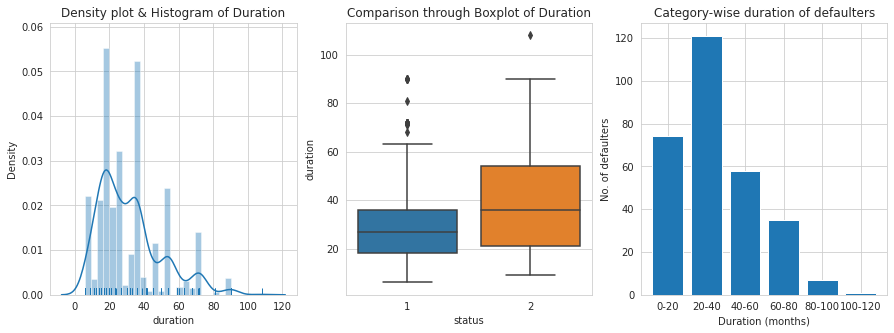

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Density plot & Histogram of Duration')
sns.distplot(df['duration'],rug=True)
plt.subplot(1,3,2)
plt.title('Comparison through Boxplot of Duration')
sns.boxplot(x='status',y='duration',data=df)
d1=len(df[(df['duration']>0)&(df['duration']<20)][df['status']==2].index.values)
d2=len(df[(df['duration']>20)&(df['duration']<40)][df['status']==2].index.values)
d3=len(df[(df['duration']>40)&(df['duration']<60)][df['status']==2].index.values)
d4=len(df[(df['duration']>60)&(df['duration']<80)][df['status']==2].index.values)
d5=len(df[(df['duration']>80)&(df['duration']<100)][df['status']==2].index.values)
d6=len(df[(df['duration']>100)&(df['duration']<120)][df['status']==2].index.values)
plt.subplot(1,3,3)
plt.title('Category-wise duration of defaulters')
plt.bar(["0-20","20-40","40-60","60-80","80-100","100-120"],[d1,d2,d3,d4,d5,d6])
plt.xlabel("Duration (months)")
plt.ylabel("No. of defaulters")
plt.show()

* The variable 'Duration' is positively skewed with presence of outliers.
* Defaulters have more duration on an average.
* Maximum no. of defaulters have duration of 20-40 months

**Amount:**

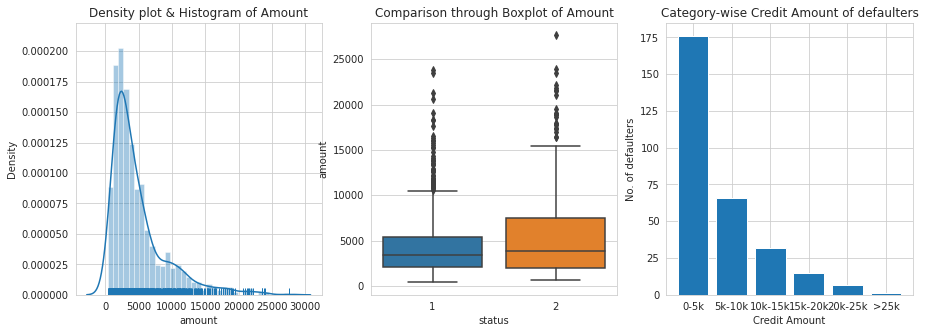

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Density plot & Histogram of Amount')
sns.distplot(df['amount'],rug=True)
plt.subplot(1,3,2)
plt.title('Comparison through Boxplot of Amount')
sns.boxplot(x='status',y='amount',data=df)
a1=len(df[(df['amount']>0)&(df['amount']<5000)][df['status']==2].index.values)
a2=len(df[(df['amount']>5000)&(df['amount']<10000)][df['status']==2].index.values)
a3=len(df[(df['amount']>10000)&(df['amount']<15000)][df['status']==2].index.values)
a4=len(df[(df['amount']>15000)&(df['amount']<20000)][df['status']==2].index.values)
a5=len(df[(df['amount']>20000)&(df['amount']<25000)][df['status']==2].index.values)
a6=len(df[df['amount']>25000][df['status']==2].index.values)
plt.subplot(1,3,3)
plt.title('Category-wise Credit Amount of defaulters')
plt.bar(["0-5k","5k-10k","10k-15k","15k-20k","20k-25k",">25k"],[a1,a2,a3,a4,a5,a6])
plt.xlabel("Credit Amount")
plt.ylabel("No. of defaulters")
plt.show()



*   'Amount' has highly positively skewed distribution along with the presence of outliers.
*   On average the Credit Amount of defaulters and non-defaulters are almost equal but it is visible that the Credit Amount of the defaulters are mostly in the range of 0-5000



**Age:**

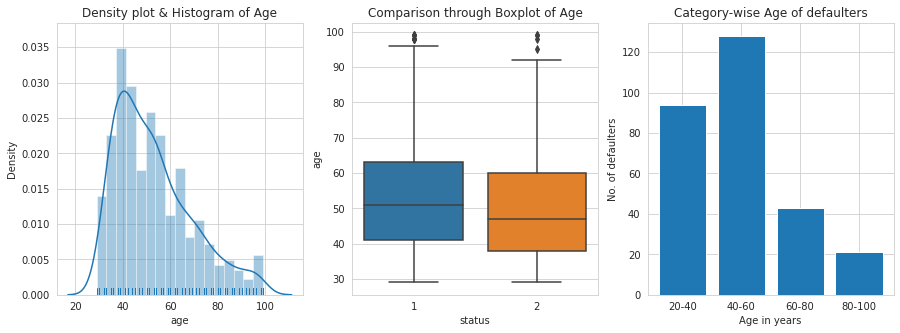

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Density plot & Histogram of Age')
sns.distplot(df['age'],rug=True)
plt.subplot(1,3,2)
plt.title('Comparison through Boxplot of Age')
sns.boxplot(x='status',y='age',data=df)
age1=len(df[(df['age']>20)&(df['age']<40)][df['status']==2].index.values)
age2=len(df[(df['age']>40)&(df['age']<60)][df['status']==2].index.values)
age3=len(df[(df['age']>60)&(df['age']<80)][df['status']==2].index.values)
age4=len(df[(df['age']>80)&(df['age']<100)][df['status']==2].index.values)
plt.subplot(1,3,3)
plt.title('Category-wise Age of defaulters')
plt.bar(["20-40","40-60","60-80","80-100"],[age1,age2,age3,age4])
plt.xlabel("Age in years")
plt.ylabel("No. of defaulters")
plt.show()



*   Age is highly positively skewed.
*   On an average the defaulters or risky customers are younger in age than the non-defaulters, mostly in the Age group 20-40 years and 40-60 years.



## Characteristics of risky customers & suitable actions that can be taken based on the continuous variables:

*   The services offered to the middle-aged and teenagers are to be checked and secured properly, and if required more constraints are to be imposed on them.
*   There may be reliability issues with customers dealing in smaller credit amounts as they are more likely to default.



## Feature scaling: -

In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder
df['checkin_acc']=LabelEncoder().fit_transform(df['checkin_acc'])
df['credit_history']=LabelEncoder().fit_transform(df['credit_history'])
df['purpose']=LabelEncoder().fit_transform(df['purpose'])
df['svaing_acc']=LabelEncoder().fit_transform(df['svaing_acc'])
df['present_emp_since']=LabelEncoder().fit_transform(df['present_emp_since'])
df['personal_status']=LabelEncoder().fit_transform(df['personal_status'])
df['other_debtors']=LabelEncoder().fit_transform(df['other_debtors'])
df['property']=LabelEncoder().fit_transform(df['property'])
df['inst_plans']=LabelEncoder().fit_transform(df['inst_plans'])
df['housing']=LabelEncoder().fit_transform(df['housing'])
df['job']=LabelEncoder().fit_transform(df['job'])
df['telephone']=LabelEncoder().fit_transform(df['telephone'])
df['foreign_worker']=LabelEncoder().fit_transform(df['foreign_worker'])
df

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
1,1,72,2,4,8927,0,2,3,1,0,3,0,33,2,1,2,2,2,0,0,2
2,3,18,4,7,3144,0,3,3,2,0,5,0,74,2,1,2,1,3,0,0,1
3,0,63,2,3,11823,0,3,3,2,2,6,1,68,2,2,2,2,3,0,0,1
4,0,36,3,0,7305,0,2,5,2,0,6,3,80,2,2,3,2,3,0,0,2
5,3,54,2,7,13583,4,2,3,2,0,6,3,53,2,2,2,1,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,18,2,3,2604,0,3,5,1,0,6,0,47,2,1,2,1,2,0,0,1
996,0,45,2,1,5786,0,2,6,0,0,6,1,60,2,1,2,3,2,1,0,1
997,3,18,2,4,1206,0,4,6,2,0,6,2,57,2,1,2,2,2,0,0,1
998,0,68,2,4,2768,0,2,6,2,0,6,3,35,2,2,2,2,2,1,0,2


## Processed exported file for model building: -

In [ ]:
from google.colab import files
df.to_csv('file_for_modelbuilding.csv',sep='\t')
files.download('file_for_modelbuilding.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Identification of risky customers (those who are likely to default): -

**Fitting Logistic Regression model: -**

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
train_dataset,test_dataset = train_test_split(df,test_size=0.3,stratify=df[['status']])

In [ ]:
x_train=train_dataset.drop("status",axis=1)
y_train=train_dataset["status"]
x_test=test_dataset.drop("status",axis=1)
y_test=test_dataset["status"]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(690, 20) (690,)
(297, 20) (297,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

**Hyperparameter tuning: -**

In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"C":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10],"penalty":["l1","l2"]}

In [ ]:
from sklearn.linear_model import LogisticRegression
score=GridSearchCV(LogisticRegression(solver='liblinear'),grid).fit(x_train_std,y_train)
print(score.best_params_)
print(score.best_score_)

{'C': 2, 'penalty': 'l1'}
0.7724637681159421


In [ ]:
LR=LogisticRegression(solver="liblinear",penalty='l1',C=2).fit(x_train_std,y_train)
y_predict=LR.predict(x_test_std)

## Checking model adequacy measures: -

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
acc=accuracy_score(y_test,y_predict)
prec = precision_score(y_test,y_predict)
rec = recall_score(y_test,y_predict)
F1_score = f1_score(y_test,y_predict)
print("The accuracy on the test dataset is {:,.4f}".format(acc))
print("Precision score on the test dataset is {:,.4f}".format(prec))
print("Recall score on the test dataset is {:,.4f}".format(rec))
print("F score on the test dataset is {:,.4f}".format(F1_score))

The accuracy on the test dataset is 0.7273
Precision score on the test dataset is 0.7797
Recall score on the test dataset is 0.8510
F score on the test dataset is 0.8138


## Feature Importance on the basis of the fitted model: -

In [ ]:
importances = pd.DataFrame(data={
    'Variables': x_train.columns,
    'Relative Importance': (abs(LR.coef_[0])/np.sum(abs(LR.coef_[0])))*100
})
importances = importances.sort_values(by='Relative Importance', ascending=False)
importances

,Variables,Relative Importance
0,checkin_acc,16.535301
2,credit_history,10.248260
1,duration,8.491921
5,svaing_acc,8.360408
4,amount,6.300322
6,present_emp_since,6.037333
13,inst_plans,5.979555
7,inst_rate,5.618549
11,property,3.970101
19,foreign_worker,3.830458


**So, Status of existing checking account & Credit History of the customers play the most important role in identifying the risky customers**